# Example use of the pywaf package

In [12]:
import datetime
import configparser
import xarray as xr
from pywaf import UmmhverfistofnumApi, CopernicusAPI, Observations

## Fetch $SO_{2}$ concentrations at ground level using the Umhverfisstonum API

In [2]:
# initialise the API object ...
api = UmmhverfistofnumApi(
    # ... which will store fetched data in the local_storage directory ...
    local_storage="local_storage/"
)

# ...the API object will search for data from stations that ...
result = api.get_data(

    # ... lie within this bounding box ...
    minlat = 63.7, 
    maxlat = 64.3,
    minlon = -23.0,
    maxlon = -21.0,

    # ... and were operational at some point between these two dates ...
    start = datetime.datetime(2021,7,18),
    end = datetime.datetime(2021,7,20),

    # ... for this species:
    species = 'SO2'

    # If the data is present in local_storage, that data will be returned,
    # otherwise, it will fetch the data using the Umhverfisstofnum API 
)


2021-07-18.nc exists, loading from local storage.
2021-07-19.nc exists, loading from local storage.
20 stations between 2021-07-18 00:00:00 and 2021-07-20 00:00:00
14 stations measuring SO2
7 within bounding box 63.7 64.3 -23.0 -21.0


In [3]:
# the results are stored in an xarray dataset that can be saved to disk as a netcdf file
result

<xarray.Dataset> Size: 6kB
Dimensions:                       (endtime: 48)
Coordinates:
  * endtime                       (endtime) datetime64[ns] 384B 2021-07-18 .....
Data variables: (12/14)
    STA-IS0044A#SO2#value         (endtime) float64 384B 17.09 17.11 ... 17.06
    STA-IS0044A#SO2#verification  (endtime) float64 384B 3.0 3.0 3.0 ... 3.0 3.0
    STA-IS0002A#SO2#value         (endtime) float64 384B 2.709 3.299 ... 3.139
    STA-IS0002A#SO2#verification  (endtime) float64 384B 1.0 1.0 1.0 ... 1.0 1.0
    STA-IS0046A#SO2#value         (endtime) float64 384B 4.837 5.11 ... 7.626
    STA-IS0046A#SO2#verification  (endtime) float64 384B 1.0 1.0 1.0 ... 1.0 1.0
    ...                            ...
    STA-IS0037A#SO2#value         (endtime) float64 384B 1.401 4.496 ... 1.31
    STA-IS0037A#SO2#verification  (endtime) float64 384B 1.0 1.0 1.0 ... 1.0 1.0
    STA-IS0005A#SO2#value         (endtime) float64 384B 2.824 2.092 ... 3.941
    STA-IS0005A#SO2#verification  (endtime) float64 384B 1.0 1.0 1.0 ... 1.0 1.0
    STA-IS0058A#SO2#value         (endtime) float64 384B 4.981 4.923 ... 5.191
    STA-IS0058A#SO2#verification  (endtime) float64 384B 3.0 3.0 3.0 ... 3.0 3.0
Attributes: (12/21)
    STA-IS0052A:    Akureyri Strandgata (við Hof)
    STA-IS0044A:    Grindavík Nesvegur
    STA-IS0041A:    Grundartangi Gröf
    STA-IS0025A:    Grundartangi Kríuvarða
    STA-IS0048A:    Grundartangi Melahverfi
    STA-IS0002A:    Hafnarfjörður Hvaleyrarholt
    ...             ...
    STA-IS0028A:    Reyðarfjörður Ljósá stöð 2
    STA-IS0005A:    Reykjavik Grensas
    STA-IS0006A:    Reykjavik Husdyragardurinn
    STA-IS0054A:    Úlfarsárdalur Lambhaga OR
    STA-IS0058A:    Vogar tjaldstæði
    creation date:  2025-07-14 14:32:37.705918

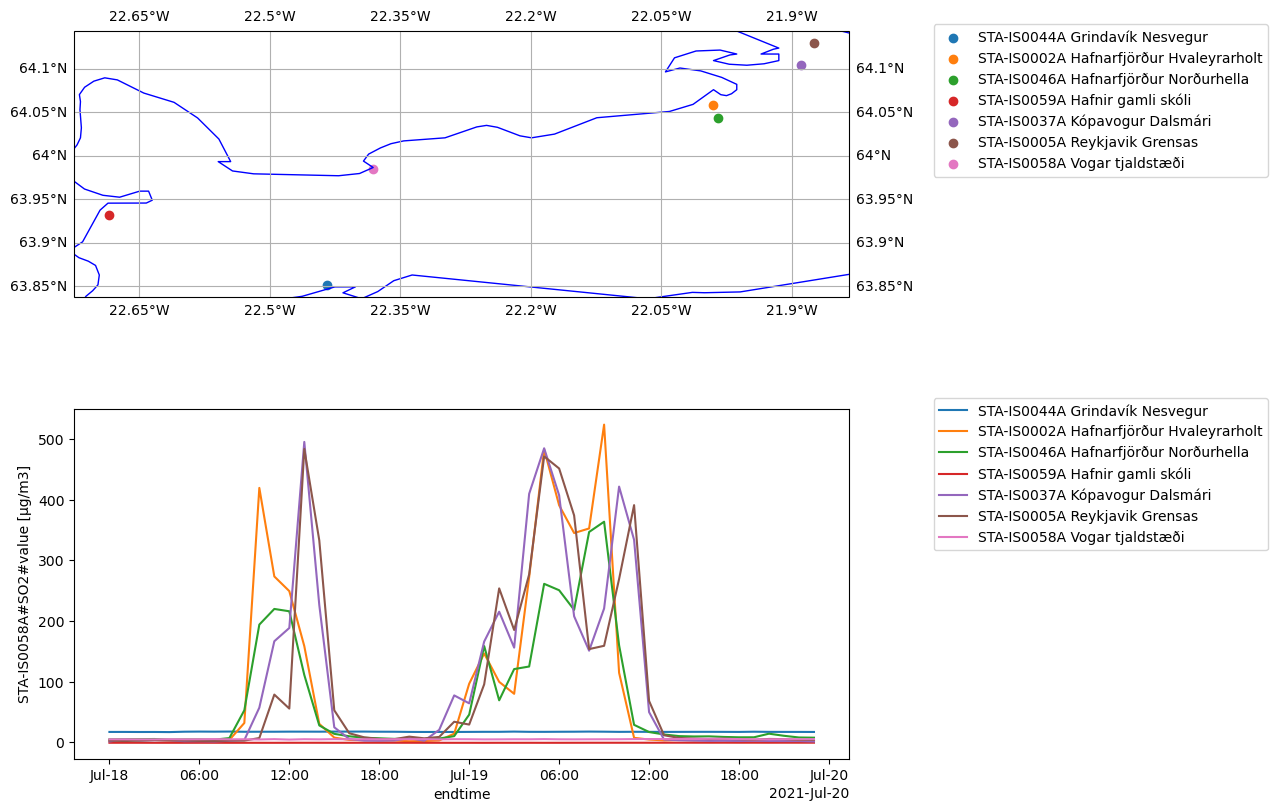

In [4]:
# the package also contains a useful plotting function for getting an overview of the data
api.plot_data(result)

In [5]:
# save the dataset as an example of DT5402
result.to_netcdf("dt5402_example.nc")

## Fetch $SO_{2}$ column amounts from Tropomi data

In [6]:
cfg = configparser.ConfigParser()
cfg.read('/home/talfan/cdse.cfg')
client_id = cfg['credentials']['client_id']
client_secret = cfg['credentials']['client_secret']

In [7]:

# Define your parameters

#start_date = "2021-05-01"   # modify as needed
#end_date = "2021-05-01"     # modify as needed
start_date = datetime.datetime(2021,7,18)
end_date = datetime.datetime(2021,7,18)

min_lat = 63.7 
max_lat = 64.3
min_lon = -23.0
max_lon = -21.0

capi = CopernicusAPI(client_id, client_secret)

df = capi.fetch_latest_data(min_lat, max_lat, min_lon, max_lon, start_date, end_date)

df

Query URL: https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=OData.CSC.Intersects(area=geography'SRID=4326;POLYGON((-23.0 63.7,-21.0 63.7,-21.0 64.3,-23.0 64.3,-23.0 63.7))') and Collection/Name eq 'SENTINEL-5P' and ContentDate/Start gt 2021-07-18T00:00:00.000Z and ContentDate/Start lt 2021-07-18T23:59:59.999Z and contains(Name,'_L2__SO2__')&$top=100
Number of products found: 15
Already downloaded: S5P_RPRO_L2__SO2____20210718T013021_20210718T031151_19489_03_020700_20250411T184606.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T031151_20210718T045321_19490_03_020700_20250411T184607.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T045321_20210718T063450_19491_03_020700_20250411T185552.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T113920_20210718T132049_19495_03_020700_20250411T184611.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T132049_20210718T150219_19496_03_020700_20250411T184612.nc
local_storage/S5P_RPRO_L2__SO2____20210718T013021_20210718T031151

,time,scanline,ground_pixel,latitude,longitude,delta_time,time_utc,qa_value,sulfurdioxide_total_vertical_column,sulfurdioxide_total_vertical_column_precision,...,species,start,end,orbit,collection,processor,creation,file type,file name,id
0,2021-07-18,3755.0,22.0,64.263779,-21.035950,2021-07-18 06:07:30.247,2021-07-18T06:07:30.247000Z,0.05,0.004026,0.003524,...,SO2,2021-07-18 04:53:21,2021-07-18 06:34:50,19491,03,020700,2025-04-11 18:55:52,nc,local_storage/S5P_RPRO_L2__SO2____20210718T045...,673f975b-e30f-41b0-bd92-30744ff84e04
1,2021-07-18,3756.0,22.0,64.230797,-21.123627,2021-07-18 06:07:31.087,2021-07-18T06:07:31.087000Z,0.01,0.004954,0.005328,...,SO2,2021-07-18 04:53:21,2021-07-18 06:34:50,19491,03,020700,2025-04-11 18:55:52,nc,local_storage/S5P_RPRO_L2__SO2____20210718T045...,673f975b-e30f-41b0-bd92-30744ff84e04
2,2021-07-18,3757.0,21.0,64.133080,-21.040705,2021-07-18 06:07:31.927,2021-07-18T06:07:31.927000Z,0.00,-0.027148,0.008099,...,SO2,2021-07-18 04:53:21,2021-07-18 06:34:50,19491,03,020700,2025-04-11 18:55:52,nc,local_storage/S5P_RPRO_L2__SO2____20210718T045...,673f975b-e30f-41b0-bd92-30744ff84e04
3,2021-07-18,3757.0,22.0,64.197937,-21.211683,2021-07-18 06:07:31.927,2021-07-18T06:07:31.927000Z,0.03,0.000737,0.003962,...,SO2,2021-07-18 04:53:21,2021-07-18 06:34:50,19491,03,020700,2025-04-11 18:55:52,nc,local_storage/S5P_RPRO_L2__SO2____20210718T045...,673f975b-e30f-41b0-bd92-30744ff84e04
4,2021-07-18,3757.0,23.0,64.282516,-21.436581,2021-07-18 06:07:31.927,2021-07-18T06:07:31.927000Z,0.03,-0.001306,0.004547,...,SO2,2021-07-18 04:53:21,2021-07-18 06:34:50,19491,03,020700,2025-04-11 18:55:52,nc,local_storage/S5P_RPRO_L2__SO2____20210718T045...,673f975b-e30f-41b0-bd92-30744ff84e04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2021-07-18,2884.0,334.0,64.286263,-22.333603,2021-07-18 14:22:46.436,2021-07-18T14:22:46.436000Z,0.06,0.000009,0.000050,...,SO2,2021-07-18 13:20:49,2021-07-18 15:02:19,19496,03,020700,2025-04-11 18:46:12,nc,local_storage/S5P_RPRO_L2__SO2____20210718T132...,58545d4e-014f-4572-8b4c-4a9e1b413685
509,2021-07-18,2884.0,335.0,64.293068,-22.233273,2021-07-18 14:22:46.436,2021-07-18T14:22:46.436000Z,0.07,-0.000058,0.000061,...,SO2,2021-07-18 13:20:49,2021-07-18 15:02:19,19496,03,020700,2025-04-11 18:46:12,nc,local_storage/S5P_RPRO_L2__SO2____20210718T132...,58545d4e-014f-4572-8b4c-4a9e1b413685
510,2021-07-18,2884.0,336.0,64.299812,-22.132275,2021-07-18 14:22:46.436,2021-07-18T14:22:46.436000Z,0.01,0.000048,0.000048,...,SO2,2021-07-18 13:20:49,2021-07-18 15:02:19,19496,03,020700,2025-04-11 18:46:12,nc,local_storage/S5P_RPRO_L2__SO2____20210718T132...,58545d4e-014f-4572-8b4c-4a9e1b413685
511,2021-07-18,2885.0,328.0,64.292236,-22.950195,2021-07-18 14:22:47.276,2021-07-18T14:22:47.276000Z,0.00,-0.000019,0.000048,...,SO2,2021-07-18 13:20:49,2021-07-18 15:02:19,19496,03,020700,2025-04-11 18:46:12,nc,local_storage/S5P_RPRO_L2__SO2____20210718T132...,58545d4e-014f-4572-8b4c-4a9e1b413685


# Fetch all observations for a given area and interval

In [14]:

        
cfg = configparser.ConfigParser()

cfg.read('/home/talfan/cdse.cfg')

client_id = cfg['credentials']['client_id']

client_secret = cfg['credentials']['client_secret']

obs = Observations(client_id, client_secret)


# ... lie within this bounding box ...
minlat = 63.7 
maxlat = 64.3
minlon = -23.0
maxlon = -21.0

# ... and were operational at some point between these two dates ...
start = datetime.datetime(2021,7,18)
end = datetime.datetime(2021,7,19)

dt5402 = obs.fetch(minlat, maxlat, minlon, maxlon, start, end)

2021-07-18.nc exists, loading from local storage.
20 stations between 2021-07-18 00:00:00 and 2021-07-19 00:00:00
14 stations measuring SO2
7 within bounding box 63.7 64.3 -23.0 -21.0
Query URL: https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=OData.CSC.Intersects(area=geography'SRID=4326;POLYGON((-23.0 63.7,-21.0 63.7,-21.0 64.3,-23.0 64.3,-23.0 63.7))') and Collection/Name eq 'SENTINEL-5P' and ContentDate/Start gt 2021-07-18T00:00:00.000Z and ContentDate/Start lt 2021-07-18T23:59:59.999Z and contains(Name,'_L2__SO2__')&$top=100
Number of products found: 15
Already downloaded: S5P_RPRO_L2__SO2____20210718T013021_20210718T031151_19489_03_020700_20250411T184606.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T031151_20210718T045321_19490_03_020700_20250411T184607.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T045321_20210718T063450_19491_03_020700_20250411T185552.nc
Already downloaded: S5P_RPRO_L2__SO2____20210718T113920_20210718T132049_19495_03_020700_2025041

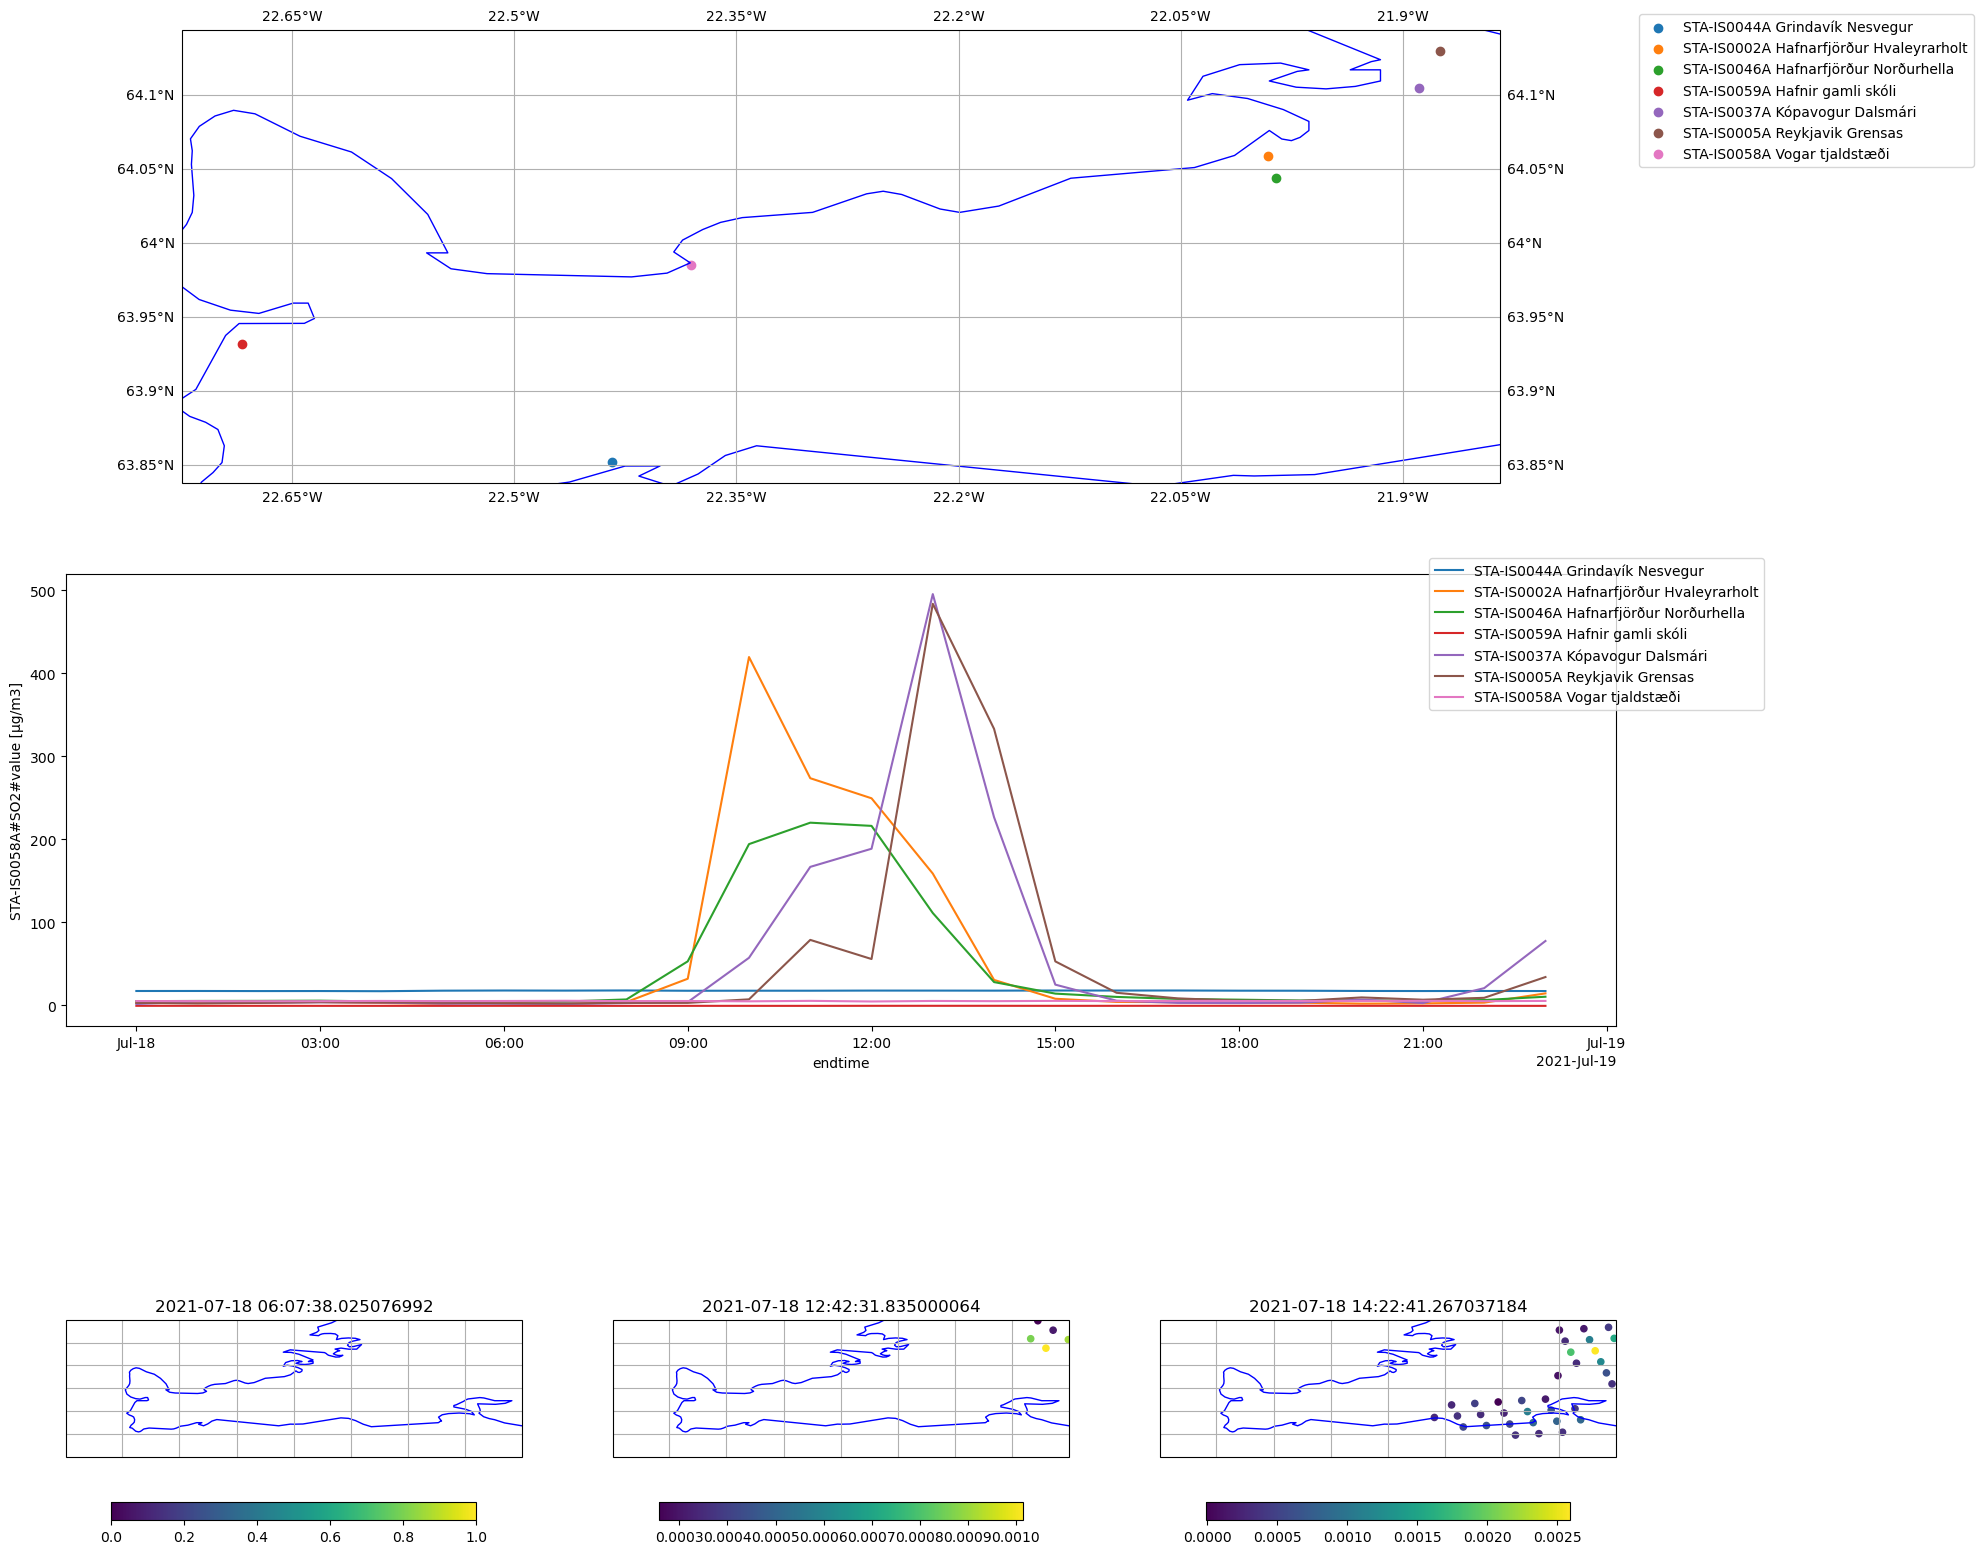

In [15]:
obs.plot_data(dt5402)

In [17]:
dt5402.to_netcdf("dt5402_example2.nc")

In [18]:
xr.open_dataset("dt5402_example2.nc")

<xarray.Dataset> Size: 641kB
Dimensions:                                        (endtime: 24, index: 513)
Coordinates:
  * endtime                                        (endtime) datetime64[ns] 192B ...
  * index                                          (index) int64 4kB 0 1 ... 512
Data variables: (12/38)
    STA-IS0044A#SO2#value                          (endtime) float64 192B ...
    STA-IS0044A#SO2#verification                   (endtime) int64 192B ...
    STA-IS0002A#SO2#value                          (endtime) float64 192B ...
    STA-IS0002A#SO2#verification                   (endtime) int64 192B ...
    STA-IS0046A#SO2#value                          (endtime) float64 192B ...
    STA-IS0046A#SO2#verification                   (endtime) int64 192B ...
    ...                                             ...
    collection                                     (index) <U2 4kB ...
    processor                                      (index) <U6 12kB ...
    creation                                       (index) datetime64[ns] 4kB ...
    file type                                      (index) <U2 4kB ...
    file name                                      (index) <U100 205kB ...
    id                                             (index) <U36 74kB ...
Attributes: (12/21)
    STA-IS0052A:    Akureyri Strandgata (við Hof)
    STA-IS0044A:    Grindavík Nesvegur
    STA-IS0041A:    Grundartangi Gröf
    STA-IS0025A:    Grundartangi Kríuvarða
    STA-IS0048A:    Grundartangi Melahverfi
    STA-IS0002A:    Hafnarfjörður Hvaleyrarholt
    ...             ...
    STA-IS0028A:    Reyðarfjörður Ljósá stöð 2
    STA-IS0005A:    Reykjavik Grensas
    STA-IS0006A:    Reykjavik Husdyragardurinn
    STA-IS0054A:    Úlfarsárdalur Lambhaga OR
    STA-IS0058A:    Vogar tjaldstæði
    creation date:  2025-07-14 14:32:36.030457